In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
%aimport tools
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

from WavDataGenerator import WavDataGenerator


from os.path import join as path_join
from os import mkdir
from os.path import isdir, basename
import glob

In [8]:
audio_file = r'C:\Development\kaggle\tensorflow-speech-recognition-challenge\data\train\audio\no\0a9f9af7_nohash_0.wav'  
SAMPLING_RATE = 16000
y,sr = librosa.load(audio_file, sr=SAMPLING_RATE)

In [9]:
audio_file = r"C:\Development\kaggle\tensorflow-speech-recognition-challenge\data\train\audio\silence\0_9000.wav"
SAMPLING_RATE = 16000
y,sr = librosa.load(audio_file, sr=SAMPLING_RATE)

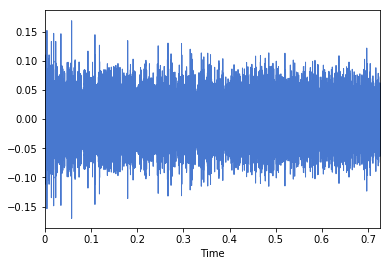

In [10]:
librosa.display.waveplot(y)

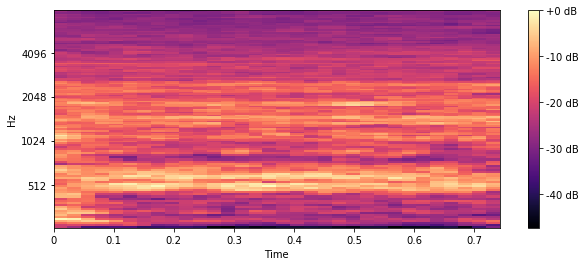

In [11]:
S = librosa.feature.melspectrogram(y=y, sr=SAMPLING_RATE, n_mels=128, fmax=8000, hop_length=512)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')

In [12]:
S.shape

(128, 32)

In [13]:
data_dir = r'C:\Development\kaggle\tensorflow-speech-recognition-challenge\data\train\audio'

noise_folder = path_join(data_dir, '_background_noise_')
silence_folder = path_join(data_dir, 'silence')


In [14]:
if not isdir(silence_folder):
    create_silence_recordings(glob.glob(path_join(noise_folder, '*.wav')), 
                              silence_folder, stride=3000)

In [15]:
labels = ['silence', 'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

In [28]:
from os.path import basename
pp = r"C:\Development\kaggle\tensorflow-speech-recognition-challenge\data\train\audio\no\5c8af87a_nohash_4.wav"
basename(pp)


'5c8af87a_nohash_4.wav'

In [16]:
dg = WavDataGenerator(data_dir, labels, 128, 32)

In [18]:
for bd, bl in dg.generator():    
    break

In [39]:
np.min(bd)

0.0